In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread('./test_images/maria-sharapova.jpg')
img.shape


(1920, 1280, 3)

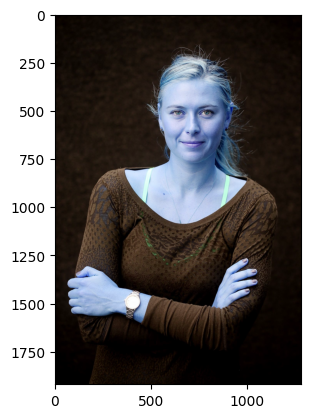

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1920, 1280)

In [5]:
gray

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1920, 1280), dtype=uint8)

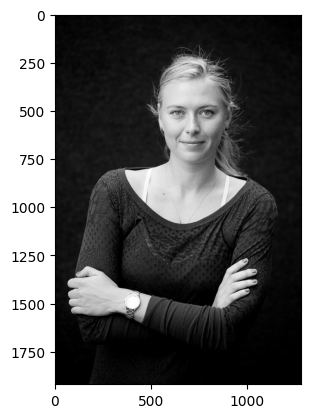

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('./model/opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./model/opencv/haarcascade/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[508, 352, 397, 397]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(508), np.int32(352), np.int32(397), np.int32(397))

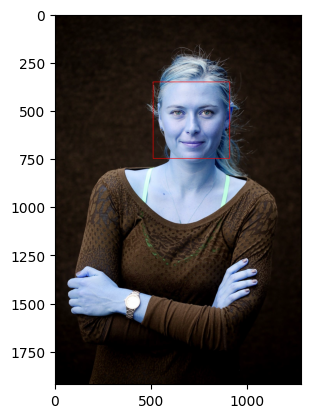

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.2, minNeighbors=10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

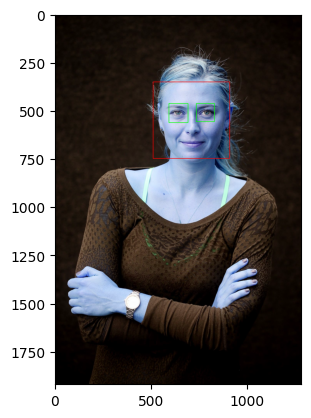

In [11]:
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()


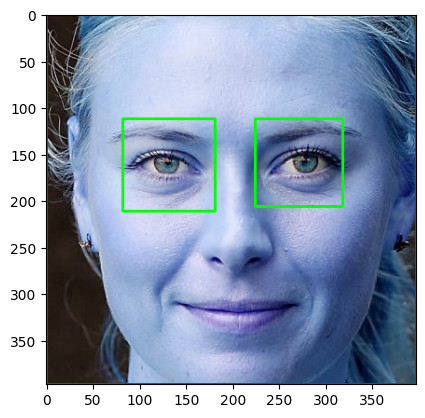

In [12]:
plt.imshow(roi_color,cmap='gray')


In [13]:
def get_cropped_images_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color 

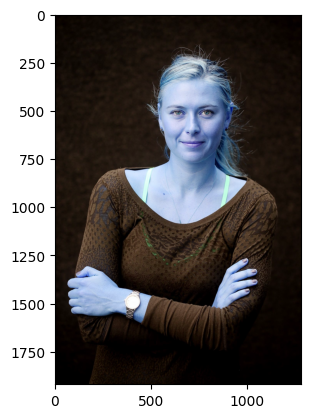

In [14]:
original_image=cv2.imread('./test_images/maria-sharapova.jpg')
plt.imshow(original_image)

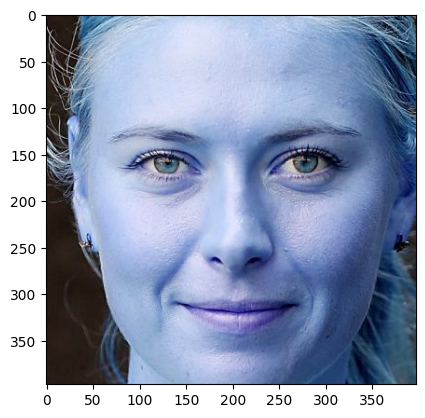

In [15]:
cropped_image=get_cropped_images_if_2_eyes('./test_images/maria-sharapova.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data="./model/dataset"
path_to_cr_data="./model/dataset/cropped/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs


['./model/dataset\\cropped',
 './model/dataset\\lionel_messi',
 './model/dataset\\maria_sharapova',
 './model/dataset\\virat_kohli']

In [19]:
import shutil 
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_images_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_images_if_2_eyes(entry.path)  # Fixed function name
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_images_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder: ./model/dataset/cropped/lionel_messi
Generating cropped images in folder: ./model/dataset/cropped/maria_sharapova
Generating cropped images in folder: ./model/dataset/cropped/virat_kohli


In [21]:
import numpy as np
import pywt 
import cv2

In [22]:
def w2d(img,mode='haar',level=1):
    imArray=img
    #datatype conversions
    # convert to graycode
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray=np.float32(imArray)
    imArray /=255;
    #compute coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)

    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H=np.uint8(imArray_H)

    return imArray_H

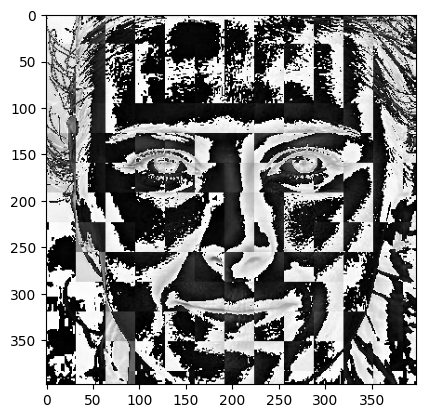

In [23]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [24]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./model/dataset/cropped/lionel_messi\\lionel_messi1.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi2.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi3.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi4.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi5.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi6.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi7.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi8.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi9.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi10.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi11.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi12.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi13.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi14.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi15.png',
  './model/dataset/cropped/lionel_messi\\lionel

In [25]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'cropped': 0, 'lionel_messi': 1, 'maria_sharapova': 2, 'virat_kohli': 3}

# Image in cropped folder can be used for model training.We will use these raw image along with wavelet transformed images to train our classifier.Lets prepare X and Y now

In [27]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(x[0])

4096

In [29]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape


(41, 4096)

# Data cleaning is done now train our model

We will use svm with rbf kernal tuned with heuristic finetuning

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

1.0

In [32]:
len(x_test)

11

In [33]:
print(classification_report(y_test, pipe.predict(x_test), zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



# Lets use GridSearch to try out different models with different paramets.Goal is to come up with best modle with best fine parameters


In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [35]:

model_params = {
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10, 50, 100]  # More realistic values
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='lbfgs', max_iter=1000),  # ✅ Clean & future-proof
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [36]:
scores=[]
best_estimators={}
import pandas as pd
for algo,np in model_params.items():
    pipe=make_pipeline(StandardScaler(),np['model'])
    clf=GridSearchCV(pipe,np['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df



,model,best_score,best_params
0,svm,0.866667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.900000,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.900000,{'logisticregression__C': 1}


In [37]:
best_estimators['svm'].score(x_test,y_test)

1.0

In [38]:
best_estimators['random_forest'].score(x_test,y_test)

0.9090909090909091

In [39]:
best_estimators['logistic_regression'].score(x_test,y_test)

1.0

In [40]:
best_clf=best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm


array([[3, 0, 0],
       [0, 4, 0],
       [0, 0, 4]])

Text(95.72222222222221, 0.5, 'Truth')

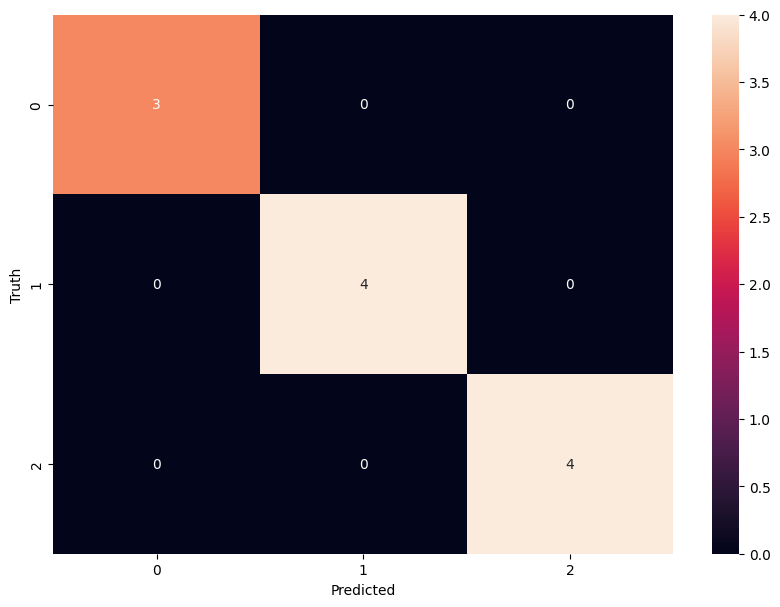

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'cropped': 0, 'lionel_messi': 1, 'maria_sharapova': 2, 'virat_kohli': 3}

Saved the trained model

In [44]:
import joblib

joblib.dump(best_clf,'saved_model.pkl1')

['saved_model.pkl1']

Save Class Dictionary

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))